C:\Users\st\AppData\Local\Temp\ipykernel_4764\2539122078.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
C:\Users\st\AppData\Local\Temp\ipykernel_4764\2539122078.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Accuracy: 0.9134
Confusion Matrix:
[[4588  350]
 [ 506 4444]]
Precision Score (weighted): 0.9138457363427653
Recall Score (weighted): 0.9134304207119741
F1 Score (weighted): 0.9134105264607177
ROC AUC Score: 0.9751


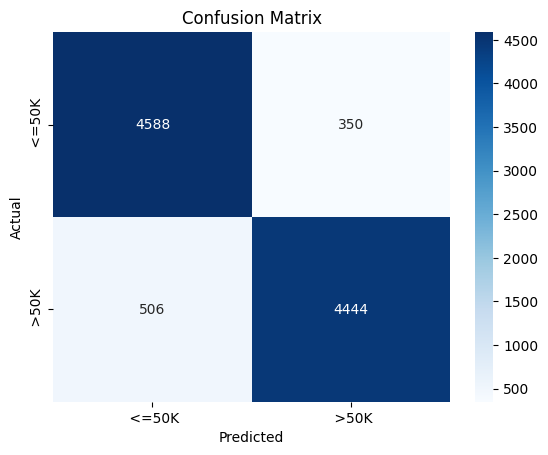

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best Parameters from Randomized Search: {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# dataset
file_path = r"d:\4th semester\Programming for AI\adult.data"
data = pd.read_csv(file_path, header=None)

# column names
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "Class"
]
data.columns = columns

# Handle missing values
data.replace(' ?', np.nan, inplace=True)
for column in data.columns:
    if data[column].dtype == 'object':  
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  
        data[column].fillna(data[column].mean(), inplace=True)

# Features and target separation
X = data.drop('Class', axis=1)
y = data['Class']


#  One-Hot Encoding 
categorical_cols = X.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
X_encoded = pd.DataFrame(ohe.fit_transform(X[categorical_cols]))
X_encoded.columns = ohe.get_feature_names_out(categorical_cols)
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Interaction features (example: age * education-num)
X['age_education'] = X['age'] * X['education-num']


le = LabelEncoder()
y = le.fit_transform(y)

# class imbalnce
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state =42)

params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 150,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

#  training
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#probability
y_prob = model.predict_proba(X_test)[:, 1]  


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, and F1 Score
print("Precision Score (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


param_dist = {
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 150],
    
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1]
}
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=30,
                                   scoring='roc_auc',
                                   cv=2,
                                   verbose=1,
                                   random_state=42)
random_search.fit(X_train, y_train)

print(f"nice Parameters from Randomized Search: {random_search.best_params_}")






In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid = {
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=2,n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train, y_train)


print(f"suitable Parameters from Grid Search: {grid_search.best_params_}")

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best Parameters from Grid Search: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.9}
